In [1]:
import pandas
import numpy as np

In [2]:
#  Load the data from combined_df.csv
combined_df = pandas.read_csv('../combined_df.csv')

combined_df.drop(columns=['post'], inplace=True)

In [3]:
from sklearn.model_selection import train_test_split


X = combined_df.drop('subreddit', axis=1)  # Features
y = combined_df['subreddit']  # Target

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
# Step 2: Standard Scaling and Min-Max Scaling for numerical features
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X_final = standard_scaler.fit_transform(X)

# pca = PCA(n_components=100)  # You can adjust the number of components as needed
# X_pca = pca.fit_transform(X_final)
# X_final = minmax_scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_final  , y, test_size=0.2, random_state=42)

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Encode the categorical target variable (y_train) using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Step 2: Flatten the encoded labels
y_train_encoded = y_train_encoded.argmax(axis=1)
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).argmax(axis=1)

# Give mapping of y_test_encoded to y_test
y_test_encoded_to_y_test = dict(zip(y_test_encoded, y_test))

In [7]:


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train_encoded)

# Making predictions on the test data
predictions = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.664886515353805


In [8]:
# Generating a classification report
print("Classification Report:\n", classification_report(y_test_encoded, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.57      0.69      1577
           1       0.73      0.81      0.77      9182
           2       0.82      0.64      0.72      1254
           3       0.79      0.76      0.78     11419
           4       0.81      0.34      0.48      1754
           5       0.93      0.53      0.67      4899
           6       0.56      0.77      0.65     23472
           7       0.72      0.42      0.53      4724
           8       0.91      0.51      0.65      1766
           9       0.94      0.21      0.34      1788
          10       0.63      0.57      0.60     13065

    accuracy                           0.66     74900
   macro avg       0.79      0.56      0.63     74900
weighted avg       0.70      0.66      0.66     74900



In [9]:
print(y_test_encoded_to_y_test)

{6: 'depression', 10: 'suicidewatch', 1: 'adhd', 7: 'lonely', 4: 'autism', 3: 'anxiety', 2: 'alcoholism', 0: 'addiction', 9: 'schizophrenia', 5: 'bpd', 8: 'ptsd'}


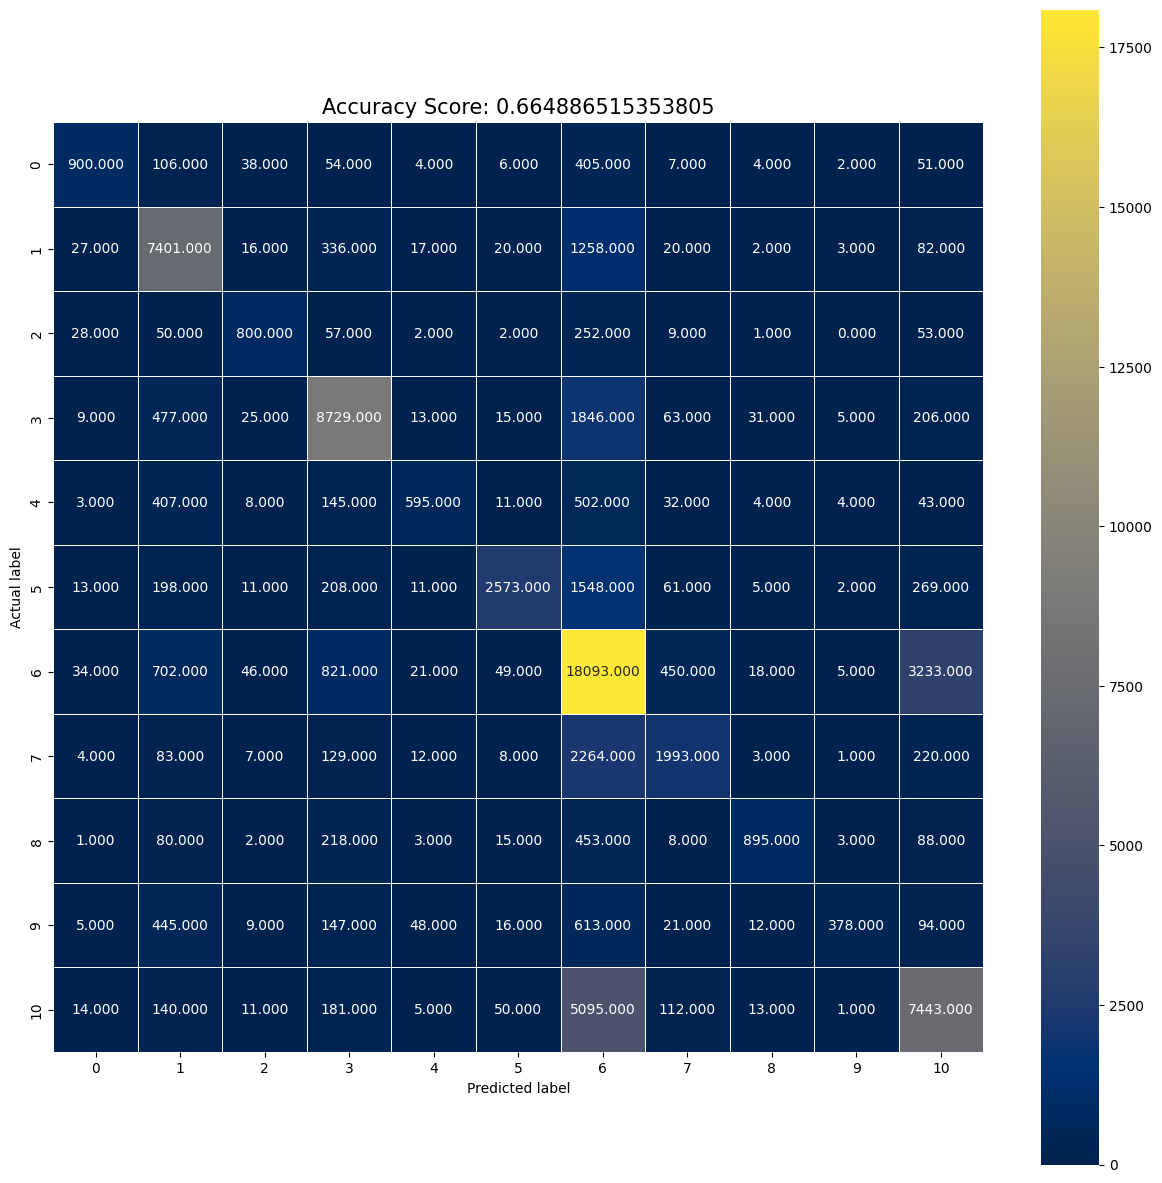

In [10]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test_encoded, predictions)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='cividis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy), size=15)
plt.show()

